# Regression

Regression is a statistical concept studying any existing relationships between two or more variables. Machine Learning uses Regression to derive models for the sake of analysis, predictions and classifications of a data in interest.<br>
Usually, in regression problems, there is one dependent variable with at least one or more independent variables. The dependend variable is refered to as **predicted, label, class, or cluster** where the independed varialbe(s) is refered to as **predector(s), regressor(s), or featrue(s)**.

More often, data with one independed variable is not of great inetereset in _Machine Learning_ because:

- data collected from real time problems is affected by many factors. Data appeared to be affected by only one variable is prone to uncertinity and incompleteness or, in such case, is highly propable to be deceptive!

- data with one predector and one class can be solved with no much work. Actually, there is one closed form to derive the linear relationship between the predector and the class ** will be shown later **. Moreover, if that one variable appears to have a non-linear relationship with its class, this indicates another hidden feature. Sometimes, the model may produce a feature from the existing independent variable to produce a non-linear model.

Data is, usually, presented as an nd_array of featrues where each column holds a feature of the data and each row holds one instance from each feature. Classes, or depended vairable, are provided as a vector of values. The feature matrix is commonly known as ** Design Matrix**.<br>
It is important to say that Machine Learning techniques are applied to a sample from the space of the universe of the given data. If the whole universe of the data is available, then one can drow a function of order n-1, where n is the _universe size_, to pass by all the points of the data. Hence, it is not a learning problem rather than a calculus problem, a actually a tedious one!

This notebook tries to give a gentle introduction to the problem of regression in machine learning along with mathematical concepts underlying them. The code for implementing their algorithms is also availbel with a great help of Anaconda2 libraries.

### Building Up an Example

To start discussing linear regression, we should have an existing data to work on. Real dataset is, of course, preferable. There are large data houses where someone can target and play with. choosing a dataset is a critical decision! some of data available on the web might be corrupted, not properly collected, or some features are missin, therefore results are inappropriate or might have a weird sense.<br>
There are plenty of online data resources such as, just to name a few, Kaggle, Wikipedia Google could, Amazon cloud and of course Github.
This blog is useful to look at:
https://www.dataquest.io/blog/free-datasets-for-projects/


Fotunately, scikit learn library provides bunch of datasets ready to do analisys with.<br>
I am going, However, to choose the dataset given in the course assignments for regression problems. That is, kc_house_data.csv. I am going to import it as Panda dataframe so that it is easy to manipulate by scikit and numpy algorithms. Althought there are many other alternatives, working with Pandas data frames seems to be more convenient and the first choice to come in mind. Moreover, some other libraries, i.e. graphlab, requires a licence!

In [3]:
# Load Pandas to read the csv file. You should have that file and the ipython file in the same directory.
import pandas as pd

# This is a pretty function from Ipython library. It can be used print many formats including images as well!!
from IPython.display import display

file_name = 'kc_house_data.csv'
data = pd.read_csv(file_name)

# You can visualize the data by un/commenting the following statement:
#display(data)


### Linear Regression with only one variable

Let us start our discussion of regression algorithms on data having only one independent variable. Suppose that you are given the following data:

In [31]:
df = {'x':[11, 23, 17, 14, 25, 18, 16, 20], 'y':[77, 103, 85, 81, 110, 91, 83, 93]}
df_one_variable_reg = pd.DataFrame(data=df)

#display(df_one_variable_reg)

let us plot this data against the independent variable:

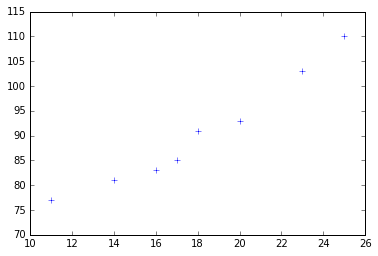

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.ylim(70,115)
plt.plot(df_one_variable_reg['x'], df_one_variable_reg['y'], '+')

for this simple dataset, a linear relationship between $x$ and $y$ is easily observed. _Is there a possibility to drow a line that match all the $x$ points to their associated $y$ points?_ clearly the answer is _NO_.

However, there exists lines such that the difference between the true $y$ and its predicted value $\hat{y}$ is minimal. This differene is refered to as __Residual Sum of Errors or RSS.__

**How to come up with such line??**

to start derive the equation, let us say that $\hat{B_0}$ and $\hat{B_1}$ represents the intercept and slope of the true model with minimal _RSS_. then:

The sum of squares of errors between true values and that line is:
$$S = \sum_{i=1}^n \epsilon^2 = \sum_{i=1}^n(y_i - (B_0 +B_1x_i))^2$$

By optimizing these parameters, that is By setting this equation to zero and calculate the derivatives with respect to $B_0$, $B_1$, the values of $B_0$,$B_1$ are obtained.

So, for $B_0$:
$$\frac{\partial S}{\partial B_0} = -2\sum_{i=1}^n(y_i - \hat{B_0} - \hat{B_1}x_i)$$

and for $B_1$:
$$\frac{\partial S}{\partial B_1} = -2\sum_{i=1}^n(y_i - \hat{B_0} - \hat{B_1}x_i)x_i$$

Symplifying these two equations yields:

$$nB_0 + B_1 \sum_{i=1}^nx_i=\sum_{i=1}^n y_i$$

$$B_0\sum_{i=1}^nx_i + B_1 \sum_{i=1}^nx_i^2=\sum_{i=1}^n y_i x_i$$

By solving these equations simultaneously, we get:

